In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#导入新的或需要分析的时间序列ts

In [3]:

def hp(y, lamb=10):
    def D_matrix(N):
        #(N-1,N) 元素全为0
        D = np.zeros((N-1,N))
        #后(N-1,N-1)对角线元素置1
        D[:,1:] = np.eye(N-1)
        #前(N-1,N-1)对角线元素置-1
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D

    N = len(ts)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    #@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
    D = D2 @ D1
    # G = [i+λF]*-1Y
    #np.linalg.inv为矩阵求逆 套用公式 D.T@D = F F.shape=(N,N)
    g = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ ts
    return g



In [4]:
def D_matrix(N):
    #(N-1,N) 元素全为0
    D = np.zeros((N-1,N))
    #后(N-1,N-1)对角线元素置1
    D[:,1:] = np.eye(N-1)
    #前(N-1,N-1)对角线元素置-1
    D[:,:-1] -= np.eye(N-1)
    """D1
    [[-1.  1.  0. ...  0.  0.  0.]
     [ 0. -1.  1. ...  0.  0.  0.]
     [ 0.  0. -1. ...  0.  0.  0.]
     ...
     [ 0.  0.  0. ...  1.  0.  0.]
     [ 0.  0.  0. ... -1.  1.  0.]
     [ 0.  0.  0. ...  0. -1.  1.]]
    """
    return D


In [16]:
#如果存在一个滤波后的时间序列，每个位置周边元素的某种线性组合（等权重组合）等于原来的时间序列，相当于将原来的时间序列进行了过滤
D1 = D_matrix(10)
D2 = D_matrix(9)
#@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
D = D2 @ D1
F = 0.5*D.T@D
(np.eye(10)+F)

array([[ 1.5, -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-1. ,  3.5, -2. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5, -2. ,  4. , -2. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5, -2. ,  4. , -2. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5, -2. ,  4. , -2. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5, -2. ,  4. , -2. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5, -2. ,  4. , -2. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5, -2. ,  4. , -2. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5, -2. ,  3.5, -1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5, -1. ,  1.5]])

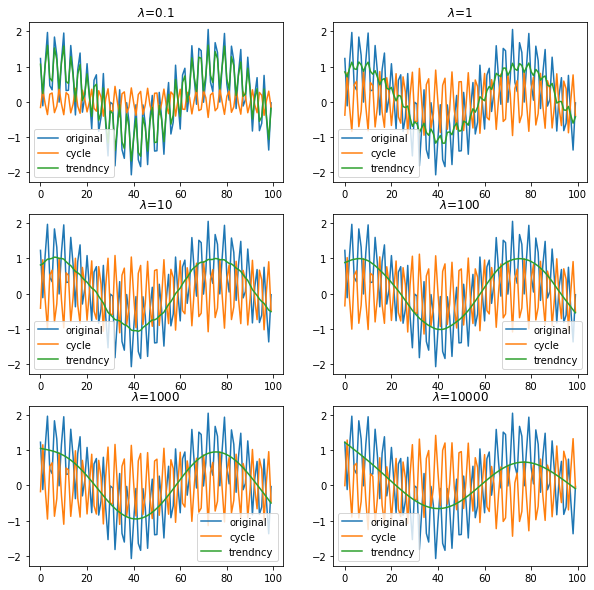

In [3]:
N = 100
t = np.linspace(1,10,N)
ts = np.sin(t) + np.cos(20*t) + np.random.randn(N)*0.1
plt.figure(figsize=(10,10))

#尝试不同的λ
for i,l in enumerate([0.1,1,10,100,1000, 10000]):
    plt.subplot(3,2,i+1)
    g = hp(ts,l)
    plt.plot(ts, label='original')
    plt.plot(g-ts, label='cycle')
    plt.plot(g, label='trendncy')
    plt.legend()
    plt.title('$\lambda$='+str(l))
plt.show()